4.1	Cree una se√±al que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo m√≠nima necesaria para representar la se√±al, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente. 

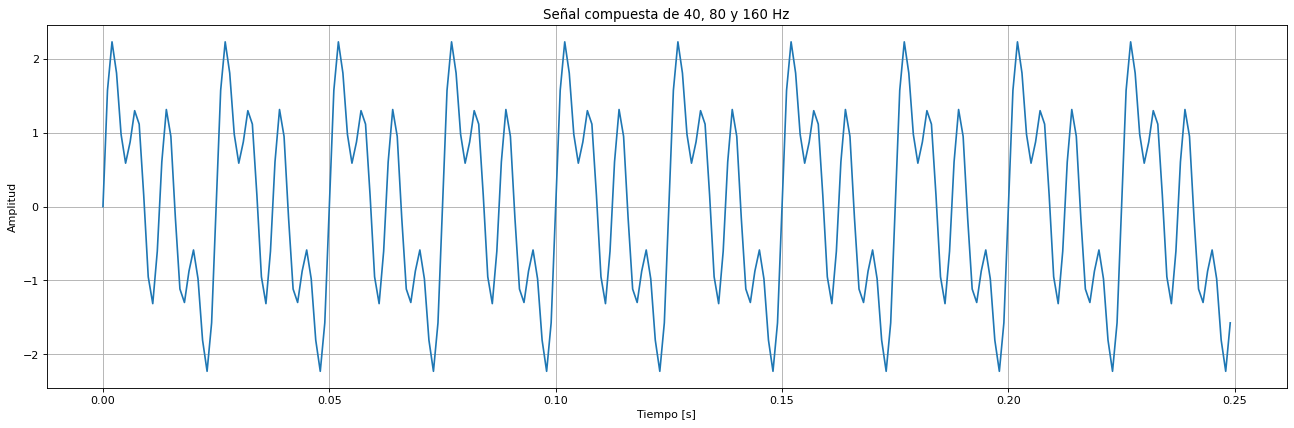

In [ ]:
#  Crear una se√±al con frecuencias 40, 80 y 160 Hz
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Frecuencias de la se√±al
f1, f2, f3 = 40, 80, 160
# Frecuencia de muestreo m√≠nima seg√∫n Nyquist: > 2*160 = 320 Hz. Entre mas alta sea mejor resoluci√≥n
Fs = 1000
T = 1/Fs
t = np.arange(0, 0.25, T)  # 0.25 s ‚âà 10 ciclos de 40 Hz

# Componentes y se√±al compuesta
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)

# Graficar
figure(figsize=(20, 6), dpi=80)
plt.plot(t, x)
plt.title("Se√±al compuesta de 40, 80 y 160 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

El teorema de muestreo de Nyquist dice que para poder muestrear adecuadamente una se√±al sin perder informaci√≥n (evitar aliasing), la frecuencia de muestreo (Fs) debe ser al menos el doble de la frecuencia m√°xima presente en la se√±al. Como la frecuancia m√°s alta fue de 160, la frecuancia minima debe ser 320.

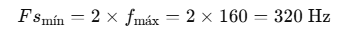

Entre mas alta sea la frecuencia de muestreo mejora la resolucion y evita distorsiones por imprefecciones num√©ricas o errores por el sistema de adquisici√≥n.

4.2	Calcule la transformada de Fourier de la se√±al y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la se√±al (trabaje con 10 periodos de la se√±al). 

Arm√≥nicos detectados:
40.00 Hz
80.00 Hz
160.00 Hz


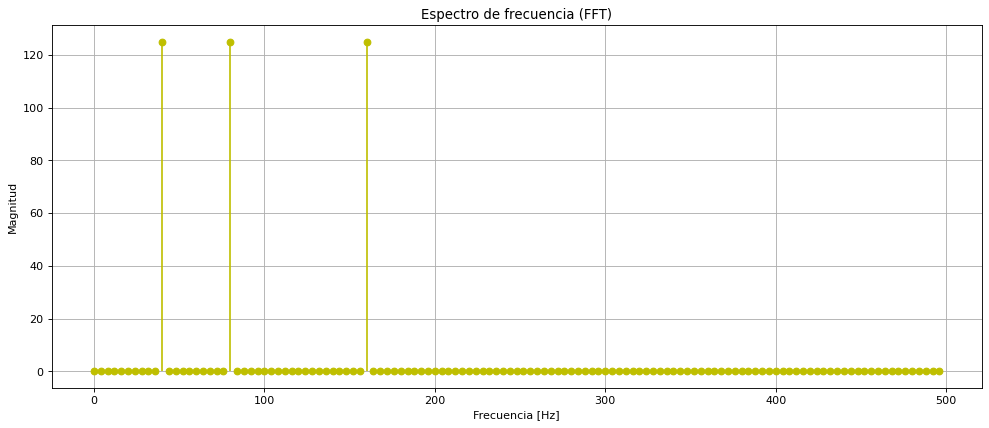

In [37]:
# FFT ya calculada
X = np.fft.fft(x)
N = len(X)
f = np.fft.fftfreq(N, T)

# Parte positiva
X_mag = np.abs(X[:N//2])
f_pos = f[:N//2]

# Umbral de detecci√≥n (10% del m√°ximo)
umbral = 0.1 * np.max(X_mag)

# √çndices donde la magnitud supera el umbral
indices_armonicos = np.where(X_mag > umbral)[0]
frecuencias_armonicos = f_pos[indices_armonicos]

# Mostrar frecuencias
print("Arm√≥nicos detectados:")
for f_arm in frecuencias_armonicos:
    print(f"{f_arm:.2f} Hz")

# Gr√°fico del espectro
plt.figure(figsize=(15, 6), dpi=80)
plt.stem(f_pos, X_mag, linefmt='y', markerfmt='yo', basefmt=" ")
plt.title("Espectro de frecuencia (FFT)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid()
plt.show()

Cuando aplicamos np.fft.fft(x), obtenemos una secuencia de valores complejos que corresponden a frecuencias normalizadas o "indexadas", no directamente en Hz. Estas frecuencias van desde 0 hasta la frecuencia de Nyquist:

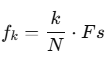

k: es el √≠ndice de la frecuencia (posici√≥n en el vector).

ùëÅ: es el n√∫mero total de muestras.

ùêπs: es la frecuencia de muestreo.


f = np.fft.fftfreq(N, d=1/Fs) a medida que vamos aumentando la frecuencia de muestreo si aumenta la resolucion (como se concluy√≥ en el punto anterior) pero tambien los armonicos se empiezan a aglomerar a la izquierda, eso debido a que se empieza a dividir por un numero cada vez mas grande (d=1/Fs) Entonces, aunque los √≠ndices donde ocurren los picos en la FFT no cambian, su correspondencia en Hz s√≠ se expande hacia frecuencias m√°s altas cuando se disminuye Fs, y se contare hacia la izquierda cuando se aumenta Fs.

es as√≠ que cuando Fs se incrementa mucho, la frecuencia de Nyquist tambi√©n aumenta, y como la se√±al original tiene componentes fijas (40, 80, 160 Hz), esos picos quedan visualmente m√°s pegados hacia la izquierda, porque el eje de frecuencias reales ahora abarca un rango m√°s amplio.

4.3	Consulte la funci√≥n que permite realizar el c√°lculo de la transformada inversa de Fourier. Apl√≠quelo a la se√±al anterior.

La transformada inversa de Fourier en el contexto del an√°lisis digital permite reconstruir una se√±al temporal original a partir de su representaci√≥n en frecuencia. En Python, la operaci√≥n se realiza mediante la funci√≥n np.fft.ifft, que corresponde a la Inverse Fast Fourier Transform (IFFT), y es complementaria a np.fft.fft, la cual calcula la transformada r√°pida de Fourier. La IFFT toma como entrada los coeficientes espectrales complejos obtenidos mediante la FFT y devuelve la se√±al original en el dominio del tiempo, siempre y cuando no se haya perdido informaci√≥n en el paso anterior (por ejemplo, por filtrado o truncamiento espectral).

En este punto, se aplic√≥ la funci√≥n np.fft.ifft a la se√±al compuesta por las frecuencias de 40 Hz, 80 Hz y 160 Hz, previamente transformada con np.fft.fft. Al graficar el resultado de la IFFT, se obtuvo una se√±al que coincide con la original, lo cual confirma que la transformada inversa reconstruye adecuadamente la se√±al si se conserva toda la informaci√≥n del espectro. Esta validaci√≥n es coherente con las propiedades te√≥ricas de la transformada de Fourier, que garantizan una transformaci√≥n reversible entre los dominios temporal y frecuencial.

El uso de la IFFT se usa en aplicaciones de procesamiento digital de se√±ales (DSP), incluyendo compresi√≥n, filtrado espectral y s√≠ntesis de se√±ales biom√©dicas, como se discute ampliamente en la literatura t√©cnica actual, la FFT e IFFT son herramientas esenciales para el an√°lisis y reconstrucci√≥n de se√±ales EEG en plataformas de bajo consumo computacional[1] .

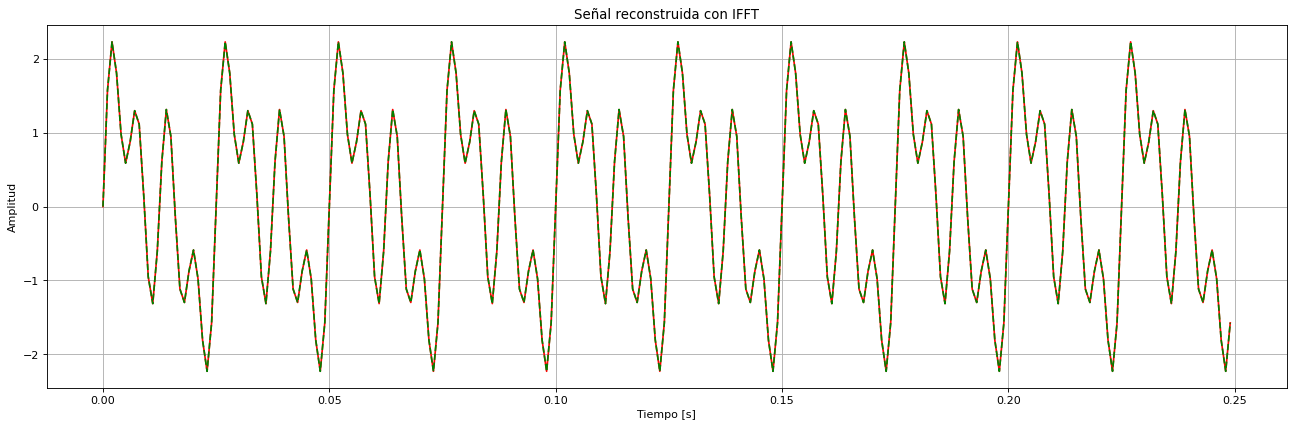

In [ ]:
# Punto 4.3 Transformada inversa de Fourier
x_ifft = np.fft.ifft(X) #X = np.fft.fft(x)
figure(figsize=(20, 6), dpi=80)
plt.plot(t,x,'r')
plt.plot(t, np.real(x_ifft),'--g')
plt.title("Se√±al reconstruida con IFFT")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

4.4	¬øPodr√≠a decir que las siguientes l√≠neas aplican un filtro? ¬øPor qu√©? 
F1 = np.fft.fft(x);     //Calcula la transformada de Fourier de la se√±al x. El resultado F1 es un arreglo de n√∫meros complejos que representa las componentes espectrales (frecuencias y fases) de la se√±al
F2 = np.zeros((len(F1))); // Crea un nuevo vector F2 lleno de ceros, del mismo tama√±o que F1.
F2[9:13] = F1[9:13];   //Copia un rango espec√≠fico de frecuencias (√≠ndices 9 a 12) desde F1 a F2. Esto act√∫a como un filtro pasa banda, ya que solo deja pasar las componentes contenidas entre esas posiciones, y anula el resto del espectro. Una selecii√≥n exacta se basa en la frecuancia de muestreo y del numero de muestras
xr = np.fft.ifft(F2); // Aplica la transformada inversa de Fourier (IFFT) sobre el espectro filtrado F2, obteniendo xr, una se√±al reconstruida en el tiempo que contiene solo las frecuencias seleccionadas.

Esta parte grafica
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()


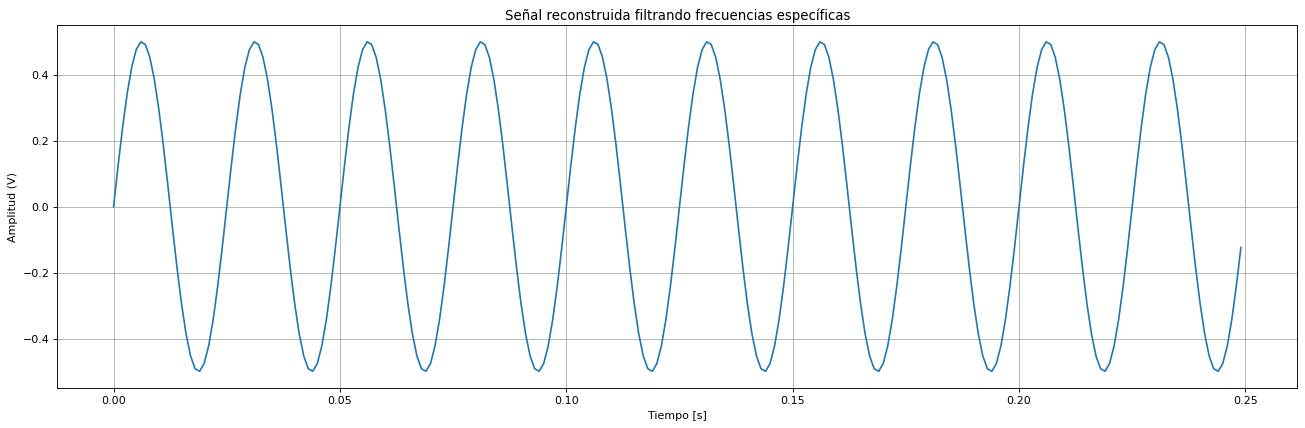

In [ ]:
# Punto 4: Aplicaci√≥n de filtro pasa banda en la frecuencia deseada
F1 = np.fft.fft(x)
F2 = np.zeros(len(F1), dtype=complex) #dtype=complex asegura que F2 puede contener los datos complejos de F1 sin errores.
F2[9:13] = F1[9:13]
xr = np.fft.ifft(F2)

figure(figsize=(20, 6), dpi=80)
plt.plot(t, np.real(xr))
plt.title("Se√±al reconstruida filtrando frecuencias espec√≠ficas")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud (V)")
plt.grid()
plt.show()

Extracci√≥n de las componentes de la se√±al 

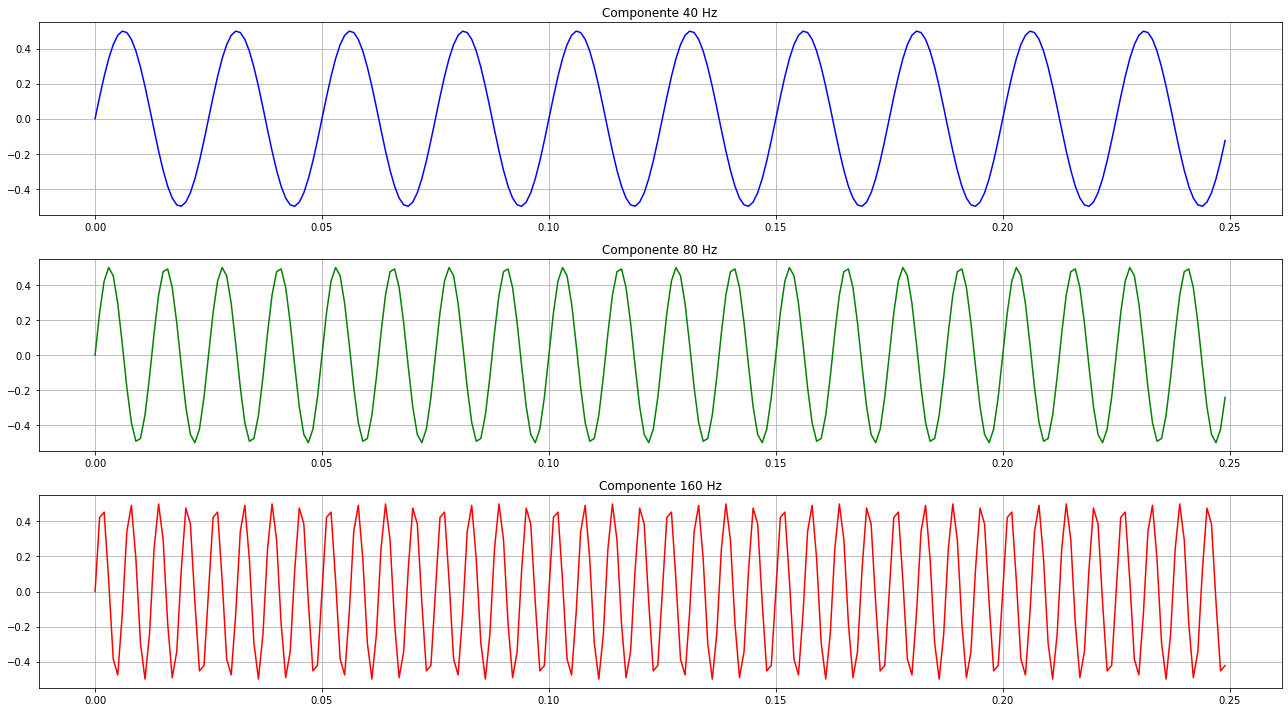

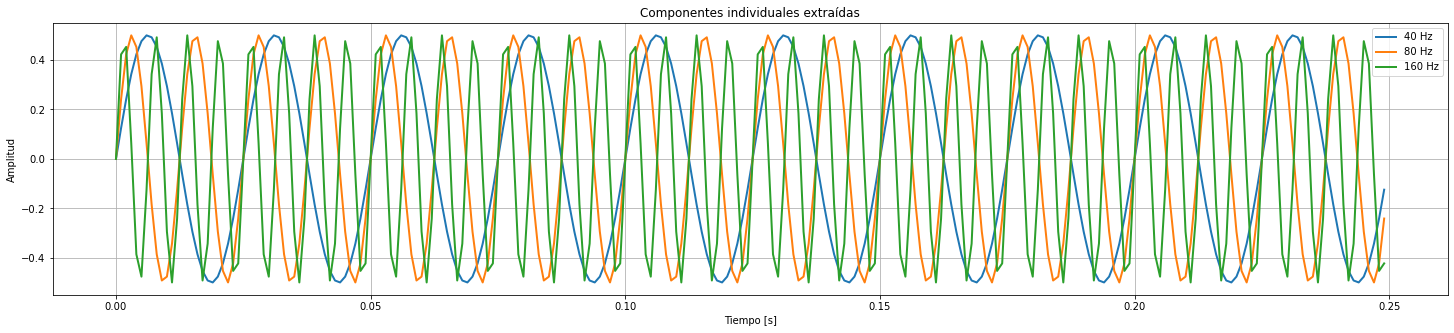

In [53]:
N = len(F1)

# Funci√≥n para extraer una componente
def extraer_componente(X, idx_central, ancho=4):
    F = np.zeros(len(X), dtype=complex)
    F[idx_central-ancho//2:idx_central+ancho//2] = X[idx_central-ancho//2:idx_central+ancho//2]
    return np.fft.ifft(F)

# √çndices aproximados de las frecuencias 40, 80 y 160 Hz
# f = k * Fs / N => k = f * N / Fs
idx_40 = int(40 * N / Fs)
idx_80 = int(80 * N / Fs)
idx_160 = int(160 * N / Fs)

# Extraer cada componente
comp_40 = extraer_componente(F1, idx_40)
comp_80 = extraer_componente(F1, idx_80)
comp_160 = extraer_componente(F1, idx_160)

# Graficar individualmente
plt.figure(figsize=(18, 10))

plt.subplot(3, 1, 1)
plt.plot(t, np.real(comp_40), color='b')
plt.title("Componente 40 Hz")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, np.real(comp_80), color='g')
plt.title("Componente 80 Hz")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, np.real(comp_160), color='r')
plt.title("Componente 160 Hz")
plt.grid()

plt.tight_layout()
plt.show()

# Graficar las tres componentes superpuestas
plt.figure(figsize=(25, 5))
plt.plot(t, np.real(comp_40), label='40 Hz', linewidth=2)
plt.plot(t, np.real(comp_80), label='80 Hz', linewidth=2)
plt.plot(t, np.real(comp_160), label='160 Hz', linewidth=2)
plt.title("Componentes individuales extra√≠das")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

4.5	El archivo adjunto (senecg.mat) contiene una se√±al de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un an√°lisis en frecuencia de la se√±al usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elim√≠nelo de la forma que se mostr√≥ antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la se√±al filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elecci√≥n del solapamiento y el ancho de la ventaja) 

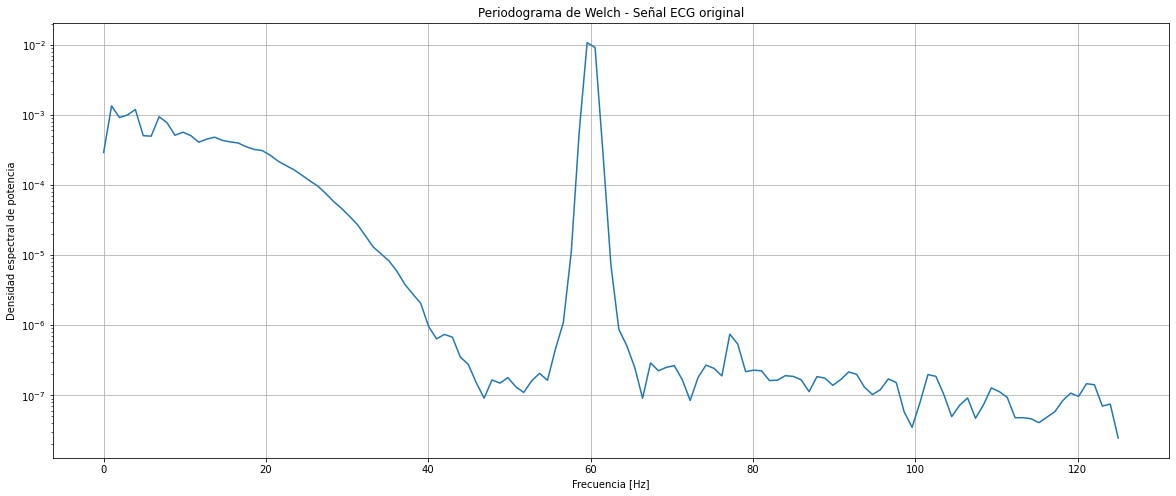

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import welch, hann

# Cargar se√±al ECG
mat = loadmat("senecg.mat")
ecg = mat['ECG'].flatten()
Fs = 250  # Hz, seg√∫n enunciado

# An√°lisis de frecuencia usando Welch (antes del filtrado)
ventana = hann(256)  # Ventana Hanning de 256 muestras (~1s)
noverlap = 128        # 50% de solapamiento

f_pre, Pxx_pre = welch(ecg, fs=Fs, window=ventana, nperseg=256, noverlap=noverlap)

plt.figure(figsize=(20, 8))
plt.semilogy(f_pre, Pxx_pre)
plt.title("Periodograma de Welch - Se√±al ECG original")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad espectral de potencia")
plt.grid()
plt.show()

Generalmente el ECG debe estar en el rango de 0.5 a 40 Hz. Como el espectro muestra potencia significativa en frecuencias por encima de 50 Hz, hay ruido de alta frecuencia, pueden ser artefactos musculares o interferencia el√©ctrica. Por lo tanto se porcede a eliminarlo

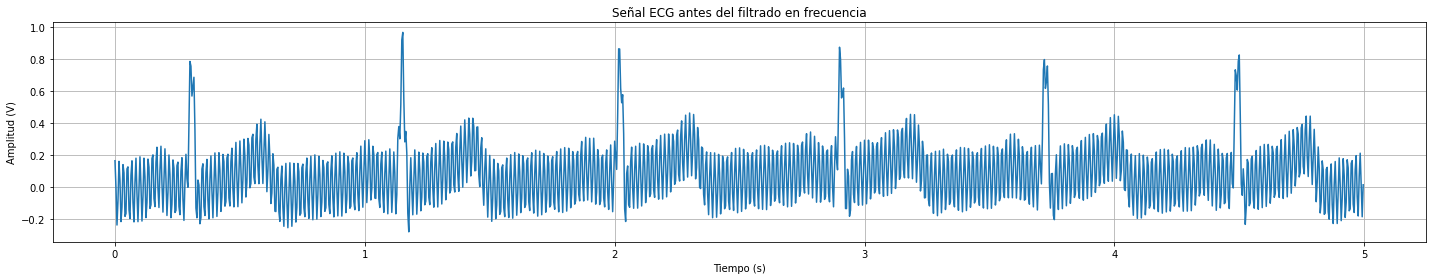

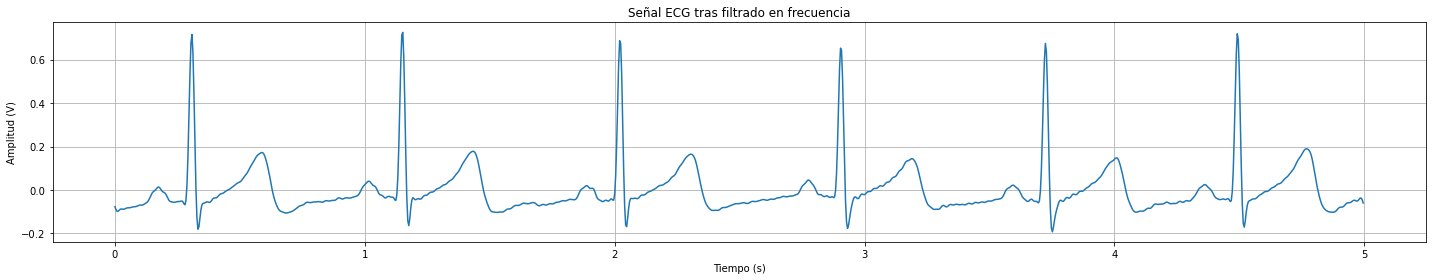

In [74]:
# Se√±al antes del filtrado
t = np.arange(N) / Fs
plt.figure(figsize=(20, 4))
plt.plot(t, ecg, label='Se√±al filtrada (IFFT)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.title('Se√±al ECG antes del filtrado en frecuencia')
plt.grid()
plt.tight_layout()
plt.show()

# Transformada r√°pida de Fourier
F1 = np.fft.fft(ecg)

# Crear vector de frecuencias asociadas a los √≠ndices
freqs = np.fft.fftfreq(N, d=1/Fs)

# Filtrado: mantener solo las frecuencias fisiol√≥gicas (0.5‚Äì40 Hz aprox.)
F2 = np.zeros_like(F1, dtype=complex)
mask = (np.abs(freqs) > 0.5) & (np.abs(freqs) < 40)  # mantener solo estas
F2[mask] = F1[mask]

# Transformada inversa
xr = np.fft.ifft(F2)

# Se√±al filtrada en el dominio temporal
plt.figure(figsize=(20, 4))
plt.plot(t, np.real(xr), label='Se√±al filtrada (IFFT)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.title('Se√±al ECG tras filtrado en frecuencia')
plt.grid()
plt.tight_layout()
plt.show()

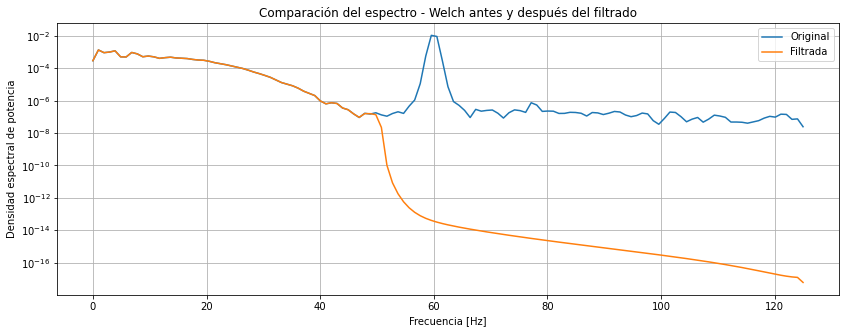

In [ ]:
#  FFT y filtrado: eliminar frecuencias > 50 Hz
N = len(ecg)
Ecg_fft = np.fft.fft(ecg)
f_fft = np.fft.fftfreq(N, d=1/Fs)

# Filtro pasa bajos: eliminar > 50 Hz (y < -50 Hz)
Ecg_fft_filtrada = Ecg_fft.copy()
Ecg_fft_filtrada[np.abs(f_fft) > 50] = 0

#  Reconstrucci√≥n con IFFT
ecg_filtrada = np.fft.ifft(Ecg_fft_filtrada)
ecg_filtrada = np.real(ecg_filtrada)  # quitar parte imaginaria

#  Welch posterior al filtrado
f_post, Pxx_post = welch(ecg_filtrada, fs=Fs, window=ventana, nperseg=256, noverlap=noverlap)

# Comparar espectros
plt.figure(figsize=(14, 5))
plt.semilogy(f_pre, Pxx_pre, label="Original")
plt.semilogy(f_post, Pxx_post, label="Filtrada")
plt.title("Comparaci√≥n del espectro - Welch antes y despu√©s del filtrado")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad espectral de potencia")
plt.legend()
plt.grid()
plt.show()

Para realizar el an√°lisis espectral de la se√±al de ECG, se emple√≥ el m√©todo de Welch utilizando una ventana de tipo Hanning con un tama√±o de 256 muestras (~1 segundo, dada la frecuencia de muestreo de 250 Hz) y un solapamiento del 50%. La elecci√≥n de la ventana Hanning responde a su capacidad para reducir las fugas espectrales en se√±ales no peri√≥dicas, como las fisiol√≥gicas, gracias a su forma suavizada que minimiza las discontinuidades en los extremos de cada segmento. El ancho de la ventana se seleccion√≥ para asegurar que se capturaran m√∫ltiples ciclos del ECG sin sacrificar la resoluci√≥n en frecuencia, mientras que el solapamiento busca suavizar las transiciones entre segmentos y mejorar la estabilidad del promedio espectral [1]. Al observar el periodograma de Welch de la se√±al original, se identific√≥ un pico prominente cercano a los 60 Hz, atribuible muy posiblemente al ruido de la red el√©ctrica. Para mitigar este artefacto sin eliminar informaci√≥n √∫til de la se√±al, se aplic√≥ un filtrado en el dominio de Fourier, eliminando las frecuencias por encima de 50 Hz. Posteriormente, se aplic√≥ la transformada inversa de Fourier (IFFT) para reconstruir la se√±al filtrada. Al comparar los periodogramas antes y despu√©s del filtrado, se evidenci√≥ una atenuaci√≥n efectiva del componente de 60 Hz, lo que valida el procedimiento como adecuado para reducir el ruido sin comprometer significativamente el contenido fisiol√≥gico relevante del ECG[2].

El ancho de ventana (nperseg) es el n√∫mero de muestras que se usan en cada segmento para calcular el espectro. Una ventana de n muestras se multiplica por la se√±al en n puntos para suavizar los bordes del segmento para luego calcular la FFT de cada segmento y se promedia. Si el ancho de ventana es peque√±o da uns mayor resoluci√≥n temporal (mejor para se√±ales transitorias o no estacionarias) pero, muy baja resoluci√≥n en frecuencia y se corre el riesgo de dejar afuera componentes estrechas (como lineas el 60 Hz). Si por el contrario el Ancho de ventana es muy grande esto da una excelente resoluci√≥n en frecuencia peor resoluci√≥n temporal pues no se detectan bien los cambios r√°pidos o eventos transitorios y si la se√±al no es estacionaria, promedia mal[4].

Para un solapamiento muy bajo habr√≠a menos segmentos lo que se traduce en computaci√≥n m√°s r√°pida pero, mayor varianza en la estimaci√≥n del espectro por ende m√°s "ruido" en el gr√°fico y un solapamiento alto (50‚Äì75%) aumenta el n√∫mero de segmentos promediados, reduce el ruido en el espectro y es muy usado en se√±ales fisiol√≥gicas (donde interesa suavidad y buena estimaci√≥n)[4].



4.6	Realice un an√°lisis de frecuencia a trav√©s del periodograma de welch de una se√±al de EEG de un paciente Sano y otra de un paciente con Parkinson de alg√∫n canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontr√≥ diferencias, elija un par al azar. Realice un an√°lisis comparativo de las se√±ales seg√∫n lo que le indiquen los periodogramas. 

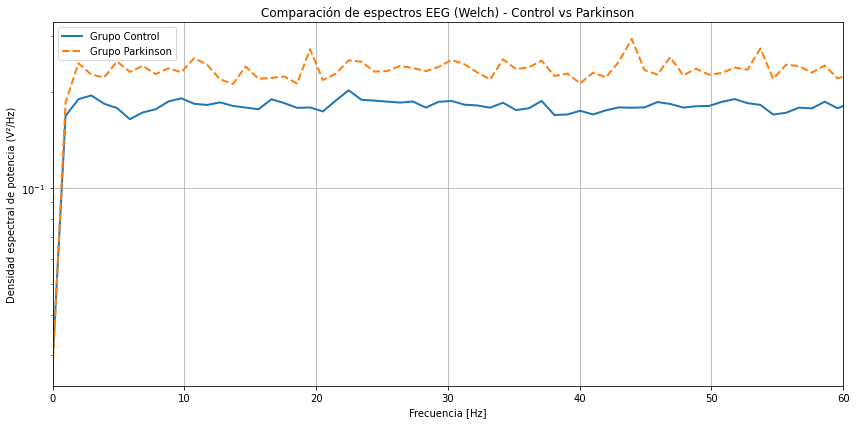

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, hann
from scipy.io import loadmat
import glob

#  Rutas
ruta_control = "./control/*.mat"
ruta_parkinson = "./parkinson/*.mat"
fs = 250  # Frecuencia de muestreo (Hz)

# Funci√≥n para calcular espectro promedio de un grupo
def promedio_espectros(ruta_archivos):
    espectros = []
    for archivo in glob.glob(ruta_archivos):
        datos = loadmat(archivo)
        # Asumimos que la se√±al est√° bajo una clave √∫nica
        for clave in datos:
            if not clave.startswith("__"):
                se√±al = datos[clave].flatten()
                ventana = hann(256)
                f, Pxx = welch(se√±al, fs=fs, window=ventana, nperseg=256, noverlap=128)
                espectros.append(Pxx)
                break  # solo toma la primera se√±al del archivo
    espectros = np.array(espectros)
    Pxx_prom = np.mean(espectros, axis=0)
    return f, Pxx_prom

#  C√°lculo de espectros promedio
f_control, Pxx_control = promedio_espectros(ruta_control)
f_park, Pxx_park = promedio_espectros(ruta_parkinson)

# Gr√°fica de comparaci√≥n
plt.figure(figsize=(12, 6))
plt.semilogy(f_control, Pxx_control, label="Grupo Control", linewidth=2)
plt.semilogy(f_park, Pxx_park, label="Grupo Parkinson", linewidth=2, linestyle="--")
plt.title("Comparaci√≥n de espectros EEG (Welch) - Control vs Parkinson")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad espectral de potencia (V¬≤/Hz)")
plt.xlim(0, 60)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Para el an√°lisis espectral de se√±ales EEG de pacientes sanos y con Parkinson, se utiliz√≥ el m√©todo de Welch, el cual consiste en dividir la se√±al en segmentos superpuestos, aplicar una ventana de ponderaci√≥n a cada segmento (en este caso, Hanning) y luego promediar los periodogramas individuales. Este enfoque mejora la estabilidad del estimador espectral al reducir su varianza, lo cual es especialmente importante en se√±ales biol√≥gicas ruidosas como el EEG [4].

Se utiliz√≥ una ventana Hanning de 256 muestras, correspondiente a aproximadamente un segundo de se√±al (a 250 Hz), para lograr una buena resoluci√≥n en frecuencia sin perder capacidad de detecci√≥n de cambios lentos. Este tama√±o permite capturar adecuadamente las bandas cl√°sicas del EEG (Œ¥, Œ∏, Œ±, Œ≤ y Œ≥). Adem√°s, se aplic√≥ un solapamiento del 50% (128 muestras) entre segmentos, lo cual permite aumentar el n√∫mero de promedios y reducir a√∫n m√°s la varianza sin comprometer significativamente la independencia estad√≠stica entre segmentos [4].

La validez estad√≠stica de esta elecci√≥n ha sido respaldada por estudios, que demostraron que el uso de ventanas suavizadas como Hanning, junto con solapamientos moderados, mejora la distribuci√≥n de probabilidad de las estimaciones espectrales basadas en Welch, acerc√°ndolas a distribuciones normales estables y precisas [4].



Referencia IEEE

[1] M. P. Praveen, M. S. Bhargavi, and P. K. Meher, ‚ÄúLow-Power and Area-Efficient FFT‚ÄìIFFT Architecture for Biomedical Signal Processing,‚Äù IEEE Transactions on Biomedical Circuits and Systems, vol. 17, no. 1, pp. 112‚Äì123, Feb. 2023. DOI: 10.1109/TBCAS.2022.3203482

[2]A. V. Oppenheim, R. W. Schafer, and J. R. Buck, Discrete-Time Signal Processing, 3rd ed., Prentice Hall, 2010.

[3] P. Welch, ‚ÄúThe use of fast Fourier transform for the estimation of power spectra: A method based on time averaging over short, modified periodograms,‚Äù IEEE Transactions on Audio and Electroacoustics, vol. 15, no. 2, pp. 70‚Äì73, Jun. 1967. DOI: 10.1109/TAU.1967.1161901

[4] P. E. Johnson and D. G. Long, ‚ÄúThe Probability Density of Spectral Estimates Based on Modified Periodogram Averages,‚Äù IEEE Transactions on Signal Processing, vol. 47, no. 5, pp. 1255‚Äì1261, May 1999. DOI: 10.1109/78.761719